### Clusterización

Es un algoritmo de aprendizaje no supervisado

Clustering significa simplemente la asignación de puntos de datos a grupos basados en la similitud de los puntos entre sí. Un algoritmo de agrupación hace que "los pájaros del mismo plumaje se junten", por así decirlo.

Cuando se utiliza para la ingeniería de características, podríamos intentar descubrir grupos de clientes que representen un segmento de mercado, por ejemplo, o zonas geográficas que compartan patrones climáticos similares. Añadir una característica de etiquetas de clúster puede ayudar a los modelos de aprendizaje automático a desenmarañar relaciones complicadas de espacio o proximidad.
El clustering es un tipo de aprendizaje no supervisado en el que los puntos de datos se agrupan en diferentes conjuntos en función de su grado de similitud.

Existen varios tipos de algoritmos de clusterizacion:<br>

- Hierarchical clustering <br>
- Partitioning clustering <br> 

Hierarchical clustering is further subdivided into:<br>

- Agglomerative clustering<br>
- Divisive clustering<br>

Partitioning clustering is further subdivided into:<br>

- K-Means clustering <br>
- Fuzzy C-Means clustering <br>

### Hierarchical clustering

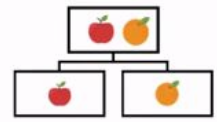

#### Agglomerative clustering

En la agrupación aglomerativa, existe un enfoque ascendente. Comenzamos con cada elemento como un conglomerado independiente y los fusionamos en conglomerados sucesivamente más masivos, como se muestra a continuación:

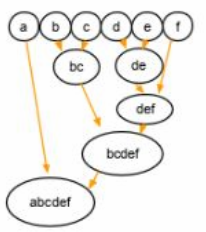

### Divisive clustering

La agrupación divisiva es un enfoque descendente. Comenzamos con todo el conjunto y procedemos a dividirlo en conglomerados sucesivamente más pequeños, como puede verse a continuación:

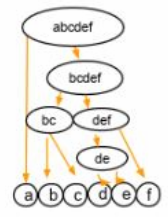

### Clustering de partición

El clustering de partición se divide en dos subtipos: clustering K-Means y Fuzzy C-Means.
En el clustering k-means, los objetos se dividen en varios clusters mencionados por el número 'K'. Así, si decimos K = 2, los objetos se dividen en dos clusters, c1 y c2, como se muestra:

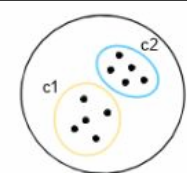

#### Kmeans

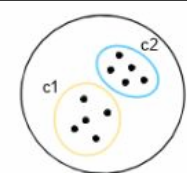

### Fuzzy C-means

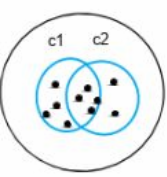

 En el clustering de k-means, un mismo objeto no puede pertenecer a dos clusters diferentes. Pero en c-means, los objetos pueden pertenecer a más de un conglomerado

----

### KMEANS

#### Ventajas de k-means

Sencillo y fácil de aplicar: El algoritmo k-means es fácil de entender e implementar, lo que lo convierte en una opción popular para tareas de agrupamiento.<br>
Rápido y eficaz: K-means es eficiente desde el punto de vista computacional y puede manejar grandes conjuntos de datos con alta dimensionalidad.<br>
Escalabilidad: K-means puede manejar grandes conjuntos de datos con un gran número de puntos de datos y puede escalarse fácilmente para manejar conjuntos de datos aún mayores.<br>
Flexibilidad: K-means se puede adaptar fácilmente a diferentes aplicaciones y se puede utilizar con diferentes métricas de distancia y métodos de inicialización.<br>

### Desventajas de K-Means:
Sensibilidad a los centroides iniciales: K-means es sensible a la selección inicial de centroides y puede converger a una solución subóptima.<br>
Requiere especificar el número de conglomerados: Es necesario especificar el número de conglomerados k antes de ejecutar el algoritmo, lo que puede resultar complicado en algunas aplicaciones.<br>
Sensible a los valores atípicos: K-means es sensible a los valores atípicos, que pueden tener un impacto significativo en los conglomerados resultantes.

### Medida de distancia
La medida de distancia determina la similitud entre dos elementos e influye en la forma de los clusters.<br>
La agrupación K-Means admite varios tipos de medidas de distancia, como:
Medida de distancia euclidiana<br>
Medida de distancia Manhattan<br>
Medida de distancia euclídea al cuadrado<br>
Medida de distancia coseno<br>

### Medida de distancia euclidiana
El caso más común es determinar la distancia entre dos puntos. Si tenemos un punto P y un punto Q, la distancia euclídea es una recta ordinaria. Es la distancia entre los dos puntos en el espacio euclídeo.
La fórmula de la distancia entre dos puntos se muestra a continuación:

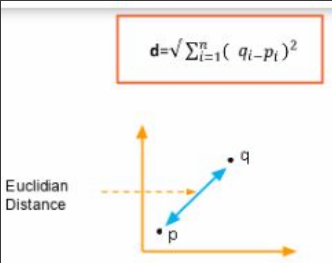

### Medida de distancia euclídea al cuadrado
Es idéntica a la medida de distancia euclidiana, pero no toma la raíz cuadrada al final. La fórmula se muestra a continuación:

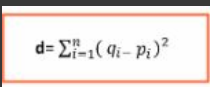

### Manhattan Distance Measure
La distancia de Manhattan es la simple suma de las componentes horizontal y vertical o la distancia entre dos puntos medida a lo largo de ejes en ángulo recto.
Nótese que tomamos el valor absoluto para que no entren en juego los valores negativos. 
La fórmula se muestra a continuación:

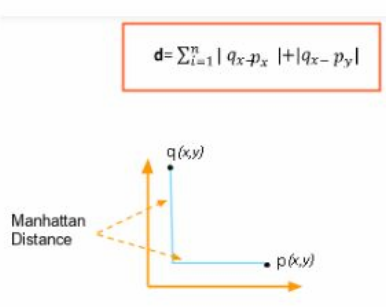

### Medida de la distancia coseno
En este caso, tomamos el ángulo entre los dos vectores formados al unir el punto de origen. La fórmula se muestra a continuación:

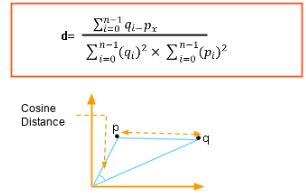

#### Secuencia Kmeans

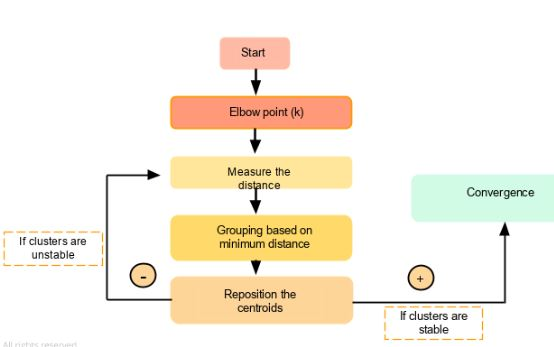

### Ejemplo 1:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [5]:
# generar los datos 
X,_ = make_blobs(n_samples=300,centers=4,cluster_std=0.60, random_state=0)

In [8]:
# curva de codo

distortions = []
K = range(1,11)

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

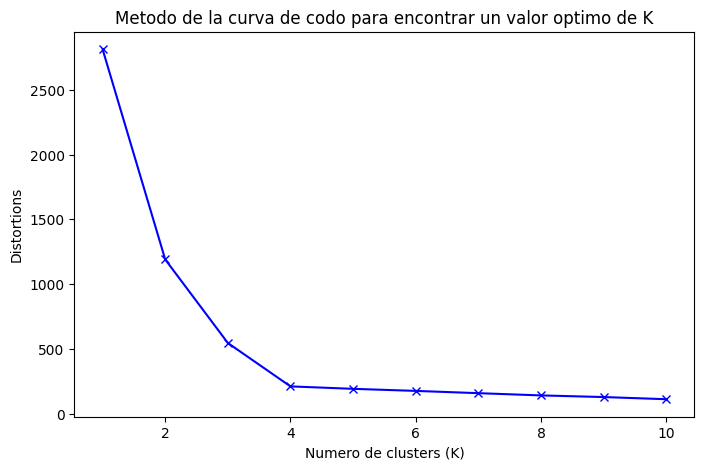

In [16]:
# grafica de codo 

plt.figure(figsize=(8,5))
plt.plot(K,distortions,'bx-')
plt.xlabel('Numero de clusters (K)')
plt.ylabel('Distortions')
plt.title('Metodo de la curva de codo para encontrar un valor optimo de K')
plt.show()

In [26]:
optimal_k = np.argmin(distortions) + 1

In [39]:
optimal_k = 4

In [40]:
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

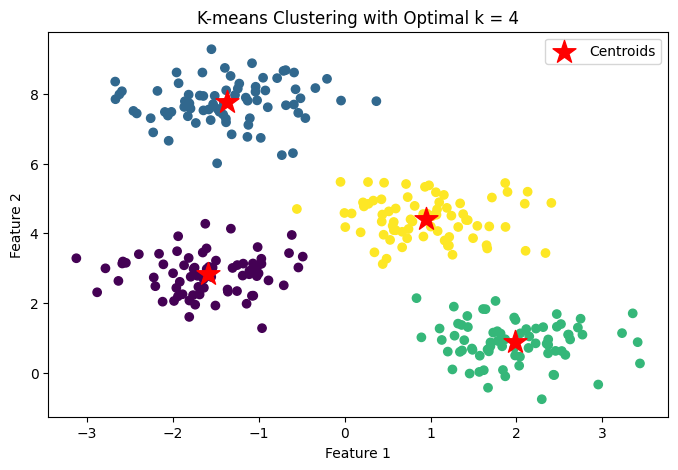

In [42]:
plt.figure(figsize=(8,5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering with Optimal k = {}'.format(optimal_k))
plt.legend()
plt.show()